In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Env:
    def reset(self):
        self.state = np.random.randint(7)
        return self.state
    
    def set_state(self, state):
        self.state = state
    
    def step(self, action):
        if action == 0:   # solid action
            self.state = 6
        else:  # dashed action
            self.state = np.random.randint(6)
        
        return self.state, 0

In [11]:
class Agent3:  # semi-gradient Q-learning

    def __init__(self, do=False):
        self.x = np.array([[2., 0, 0, 0, 0, 0, 0, 1],
                           [0, 2, 0, 0, 0, 0, 0, 1],
                           [0, 0, 2, 0, 0, 0, 0, 1],
                           [0, 0, 0, 2, 0, 0, 0, 1],
                           [0, 0, 0, 0, 2, 0, 0, 1],
                           [0, 0, 0, 0, 0, 2, 0, 1],
                           [0, 0, 0, 0, 0, 0, 1, 2]])
        self.w = np.array([1., 1, 1, 1, 1, 1, 10, 1]).T

        self.alpha = 0.01
        self.gamma = 0.99

        if do:
            self.do()

    def do(self):
        self.s_log = []
        self.w_log = []
        env = Env()
        state = env.reset()
        for step in range(1000):
            action = np.random.choice(2, p=[1/7, 6/7])
            next_state, reward = env.step(action)

            delta = reward + self.gamma * np.max(np.dot(self.x, self.w)) - np.dot(self.x[state], self.w)

            self.w += self.alpha * delta * self.x[state]

            self.s_log.append(np.dot(self.x, self.w))
            self.w_log.append(self.w.copy())
            state = next_state

In [12]:
a3 = Agent3(do=True)

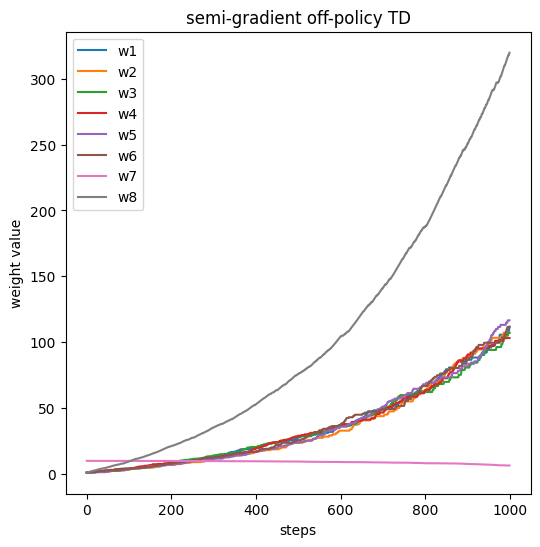

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(8):
    ax.plot([w[i] for w in a3.w_log], label='w'+str(i+1))

ax.legend()
ax.set_xlabel('steps')
ax.set_ylabel('weight value')
ax.set_title('semi-gradient off-policy TD')

plt.show()